In [36]:
import numpy as np

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/GirlsScriptOpenSource/Mlrepo/Hpothesistechnique/teaching_methods_test_scores.csv')


In [49]:
data.head()

,Traditional_Method,New_Method
0,79.967142,81.240840
1,73.617357,74.149177
2,81.476885,71.230780
3,90.230299,84.116763
4,72.658466,88.309995


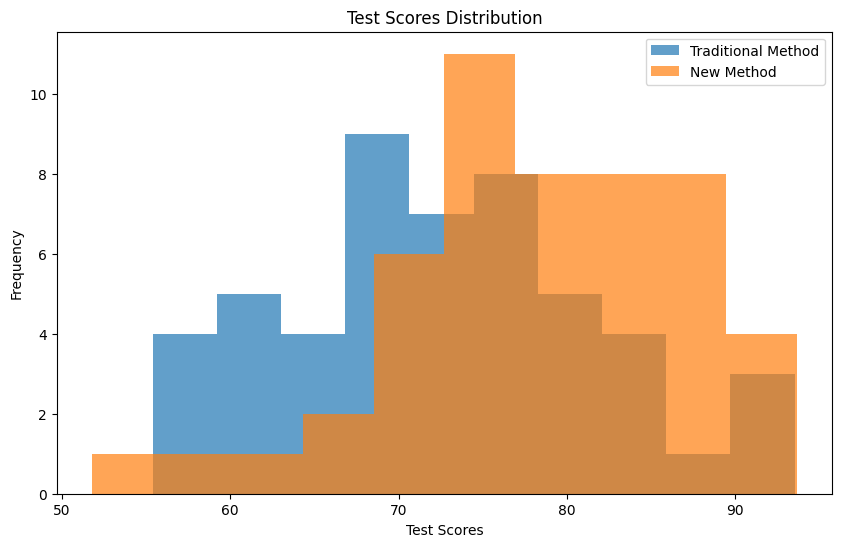

In [39]:
import matplotlib.pyplot as plt

# Visualize the data
plt.figure(figsize=(10, 6))
plt.hist(data['Traditional_Method'], bins=10, alpha=0.7, label='Traditional Method')
plt.hist(data['New_Method'], bins=10, alpha=0.7, label='New Method')
plt.legend(loc='upper right')
plt.xlabel('Test Scores')
plt.ylabel('Frequency')
plt.title('Test Scores Distribution')
plt.show()


In [40]:
import scipy.stats as stats

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(data['Traditional_Method'], data['New_Method'])

# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -3.0031208261723967
P-value: 0.0033913185510394315


In [41]:
# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis. There is a statistically significant difference in the mean test scores between students taught using the traditional method and those taught using the new method.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in the mean test scores between students taught using the traditional method and those taught using the new method.")


Reject the null hypothesis. There is a statistically significant difference in the mean test scores between students taught using the traditional method and those taught using the new method.


In [42]:
# Descriptive statistics for Traditional Method
traditional_stats = data['Traditional_Method'].describe()
print("Descriptive Statistics for Traditional Method:")
print(traditional_stats)

# Descriptive statistics for New Method
new_method_stats = data['New_Method'].describe()
print("\nDescriptive Statistics for New Method:")
print(new_method_stats)


Descriptive Statistics for Traditional Method:
count    50.000000
mean     72.745261
std       9.336688
min      55.403299
25%      66.390209
50%      72.658548
75%      78.362756
max      93.522782
Name: Traditional_Method, dtype: float64

Descriptive Statistics for New Method:
count    50.000000
mean     78.177809
std       8.743250
min      51.802549
25%      73.038887
50%      78.460803
75%      83.870741
max      93.646437
Name: New_Method, dtype: float64


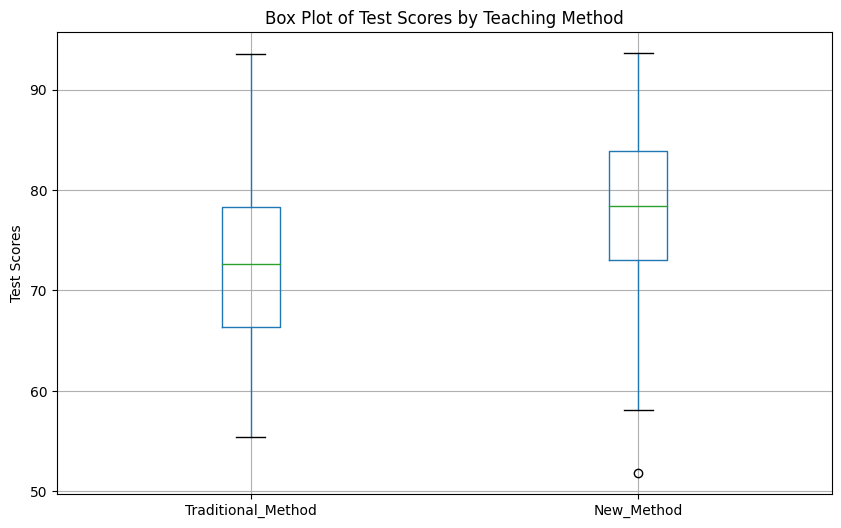

In [43]:
plt.figure(figsize=(10, 6))
data.boxplot(column=['Traditional_Method', 'New_Method'])
plt.ylabel('Test Scores')
plt.title('Box Plot of Test Scores by Teaching Method')
plt.show()


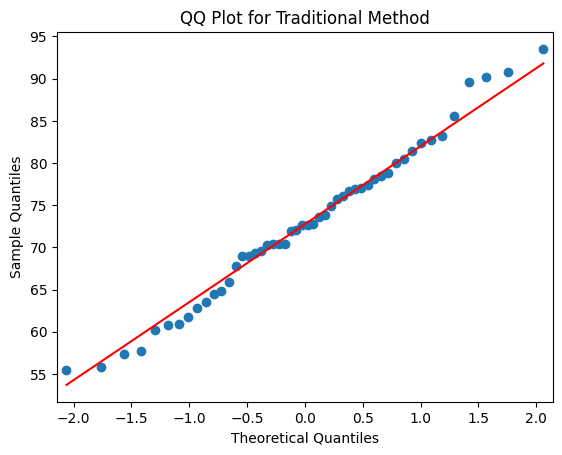

In [44]:
import statsmodels.api as sm

# QQ plot for Traditional Method
sm.qqplot(data['Traditional_Method'], line='s')
plt.title('QQ Plot for Traditional Method')
plt.show()

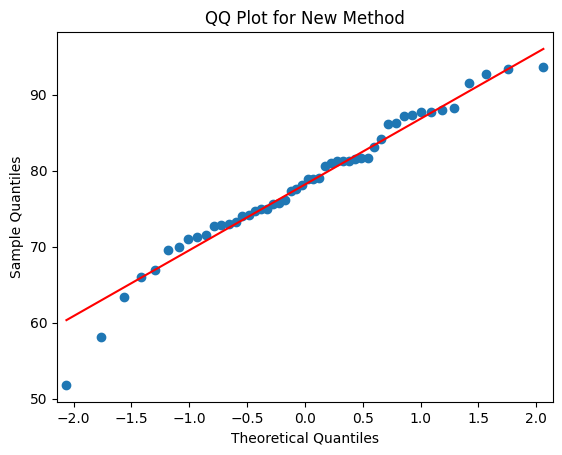

In [45]:
# QQ plot for New Method
sm.qqplot(data['New_Method'], line='s')
plt.title('QQ Plot for New Method')
plt.show()

In [46]:
def cohen_d(x, y):
    return (np.mean(x) - np.mean(y)) / np.sqrt((np.std(x, ddof=1) ** 2 + np.std(y, ddof=1) ** 2) / 2)

effect_size = cohen_d(data['Traditional_Method'], data['New_Method'])
print(f"Cohen's d: {effect_size}")


Cohen's d: -0.6006241652344793


In [47]:
diff_means = np.mean(data['New_Method']) - np.mean(data['Traditional_Method'])

# Calculate the number of students in each group
n_students_new = len(data['New_Method'])
n_students_traditional = len(data['Traditional_Method'])

# Use the calculated number of students for each group
sem_diff = np.sqrt(np.var(data['New_Method'], ddof=1)/n_students_new + np.var(data['Traditional_Method'], ddof=1)/n_students_traditional)
ci_low = diff_means - 1.96 * sem_diff
ci_high = diff_means + 1.96 * sem_diff

print(f"95% Confidence Interval for the Difference in Means: ({ci_low}, {ci_high})")

95% Confidence Interval for the Difference in Means: (1.8869715981347088, 8.978123916347142)


In [48]:
# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis. There is a statistically significant difference in the mean test scores between students taught using the traditional method and those taught using the new method.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in the mean test scores between students taught using the traditional method and those taught using the new method.")

Reject the null hypothesis. There is a statistically significant difference in the mean test scores between students taught using the traditional method and those taught using the new method.
